In [283]:
import pandas as pd 
import pandas_profiling as pp 
aguadataframe = pd.read_csv('Calidad_de_agua_2022.csv',delimiter = ';')
aguadataframe
aguadataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   orden                    168 non-null    int64 
 1   sitios                   168 non-null    object
 2   codigo                   168 non-null    object
 3   fecha                    168 non-null    object
 4   año                      168 non-null    object
 5   campaña                  168 non-null    object
 6   tem_agua                 168 non-null    object
 7   tem_aire                 166 non-null    object
 8   od                       168 non-null    object
 9   ph                       168 non-null    object
 10  olores                   168 non-null    object
 11  color                    168 non-null    object
 12  espumas                  168 non-null    object
 13  mat_susp                 168 non-null    object
 14  colif_fecales_ufc_100ml  167 non-null    o

viendo la informacion del dataset, se puede ver que hay algunas columnas que contienen valores nulos (informacion para un posterior analisis) y ademas que todas las columnas son de tipo objet lo cual nos da un indicio de que algunas columnas vamos a tener que transformarlas y cambiarlas de tipo. 

In [284]:
aguadataframe = aguadataframe.drop(columns='orden')
aguadataframe = aguadataframe.drop(columns='año')
aguadataframe = aguadataframe.drop(columns='fecha')
aguadataframe = aguadataframe.drop(columns='cd_total_mg_l')
aguadataframe = aguadataframe.drop(columns='calidad_de_agua')
aguadataframe = aguadataframe.drop(columns='hidr_deriv_petr_ug_l')
aguadataframe = aguadataframe.drop(columns='codigo')
aguadataframe = aguadataframe.drop(columns='sitios')

tomamos la decision de eliminar la columna orden debido a que no aportaba ningun tipo de informacion para el analisis de los datos. 

In [285]:
aguadataframe.columns
aguadataframe.describe()

,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,...,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,cr_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica
count,168,168,166,168,168,168,168,168,168,167,...,168,168,168,167,168,168,168,167,168,155
unique,6,93,32,130,116,6,6,6,7,90,...,87,75,68,55,51,63,27,70,15,39
top,Verano,no se midió,14,no se midió,no se midió,Ausencia,Ausencia,Ausencia,Ausencia,no se midió,...,<0.05,no se midió,no se midió,no se midió,<30,no se midió,<0.005,<10,<0.15,40
freq,42,19,25,24,23,120,119,127,106,10,...,16,17,10,53,51,10,113,74,76,13


como vemos cuando hacemos un describe nos muestra pocos datos y omite los estadisticos como la media, los cuartiles, etc. Esto es debido a que todas las variables son de tipo object asique lo que habria que hacer es convertirlas a algun otro tipo para poder analizarlas. 

In [286]:
aguadataframe1 = aguadataframe.copy()
aguadataframe1 = aguadataframe1.replace({"no se midió": pd.NA,
                                         "no midieron este día": pd.NA,
                                         "no se determinó": pd.NA,
                                         "no midio la sonda": pd.NA})
aguadataframe1 = aguadataframe1.dropna(thresh=15)

In [287]:
columnas_numericas=['tem_agua', 'tem_aire', 'od', 'ph','turbiedad_ntu','ica']
aguadataframe1[columnas_numericas]=aguadataframe[columnas_numericas].replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce')


In [288]:
boolean_columns = ['espumas', 'olores', 'color', 'mat_susp']
for col in boolean_columns:
    aguadataframe1[col] = aguadataframe1[col].replace({'Presencia': True,
                                                       'Ausencia': False,
                                                       'ausencia': False,
                                                       'Ausente': False,
                                                       }).astype(bool)

C:\Users\court\AppData\Local\Temp\ipykernel_2712\1186107394.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  aguadataframe1[col] = aguadataframe1[col].replace({'Presencia': True,
C:\Users\court\AppData\Local\Temp\ipykernel_2712\1186107394.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  aguadataframe1[col] = aguadataframe1[col].replace({'Presencia': True,
C:\Users\court\AppData\Local\Temp\ipykernel_2712\1186107394.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To

In [289]:
for col in ['cr_total_mg_l', 'clorofila_a_ug_l', 'microcistina_ug_l','nitrato_mg_l','nh4_mg_l','p_total_l_mg_l',
            'fosf_ortofos_mg_l','dbo_mg_l','dqo_mg_l','enteroc_ufc_100ml','escher_coli_ufc_100ml','colif_fecales_ufc_100ml']:  # Ajustá con el nombre de tus columnas
    aguadataframe1[col] = aguadataframe1[col].str.replace(r'^\s*<\s*', '', regex=True)  # Elimina "<" o " <" al inicio
    aguadataframe1[col] = pd.to_numeric(aguadataframe1[col], errors='coerce')  # Convierte a numérico

In [290]:
aguadataframe1 = pd.get_dummies(aguadataframe1, columns=['campaña'])

In [291]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
columnas_numericas = aguadataframe1.select_dtypes(include='number')
aguadataframe1[columnas_numericas.columns] = imputer.fit_transform(columnas_numericas).round(3)

In [292]:
aguadataframe1['microcistina_ug_l'].value_counts()

microcistina_ug_l
0.15    109
0.20     31
0.16      4
0.19      2
1.00      2
0.40      1
0.17      1
0.30      1
1.67      1
0.18      1
0.32      1
Name: count, dtype: int64

In [293]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
for col in ['cr_total_mg_l', 'clorofila_a_ug_l', 'microcistina_ug_l','nitrato_mg_l','nh4_mg_l','p_total_l_mg_l',
            'fosf_ortofos_mg_l','dbo_mg_l','dqo_mg_l','enteroc_ufc_100ml','escher_coli_ufc_100ml','colif_fecales_ufc_100ml','turbiedad_ntu']:
    aguadataframe1[col] = discretizer.fit_transform(aguadataframe1[[col]])

c:\Users\court\OneDrive\Documentos\FundamentosDatos\TPE\PracticoEspecialGrupo14\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\court\OneDrive\Documentos\FundamentosDatos\TPE\PracticoEspecialGrupo14\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\court\OneDrive\Documentos\FundamentosDatos\TPE\PracticoEspecialGrupo14\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\court\OneDrive\Documentos\FundamentosDatos\TPE\PracticoEspecialGrupo14\.venv\Lib\site-packages\sklearn\preproces

In [294]:
from sklearn.preprocessing import RobustScaler
columnas_a_escalar = aguadataframe1.select_dtypes(include='number').columns
scaler = RobustScaler()
aguadataframe1[columnas_a_escalar] = scaler.fit_transform(aguadataframe1[columnas_a_escalar])

ahora que transformamos los valores se puede ver un mejor analisis del metodo describe, por ejemplo se puede ver la media de la temperatura del agua que es de 17.82, el desvio, los valores maximos y minimos y los cuartiles.  Para las columnas que tienen valores que dicen "ausencia", "presencia", las vamos a convertir en booleanas para por ejemplo analizar la frecuencia o analizar algun tipo de correlacion con alguna otra variable.

una vez que ya pasamos todas las variables a un tipo mas analizable, podemos hacer la matriz de correlación para ver si hay variables que se relacionar por tener una correlación alta, eso si no siempre que tengan una correlacion alta significa que las variables están relacionadas

In [295]:
aguadataframe1.isna().sum()

tem_agua                   0
tem_aire                   0
od                         0
ph                         0
olores                     0
color                      0
espumas                    0
mat_susp                   0
colif_fecales_ufc_100ml    0
escher_coli_ufc_100ml      0
enteroc_ufc_100ml          0
nitrato_mg_l               0
nh4_mg_l                   0
p_total_l_mg_l             0
fosf_ortofos_mg_l          0
dbo_mg_l                   0
dqo_mg_l                   0
turbiedad_ntu              0
cr_total_mg_l              0
clorofila_a_ug_l           0
microcistina_ug_l          0
ica                        0
campaña_Primavera          0
campaña_Verano             0
campaña_invierno           0
campaña_otoño              0
dtype: int64

In [296]:
aguadataframe1.to_csv('aguitaFRESCA.csv')

In [297]:
import ydata_profiling as yp
#report = yp.ProfileReport(aguadataframe1)
#report.to_file(output_file = 'reporteagua.html')

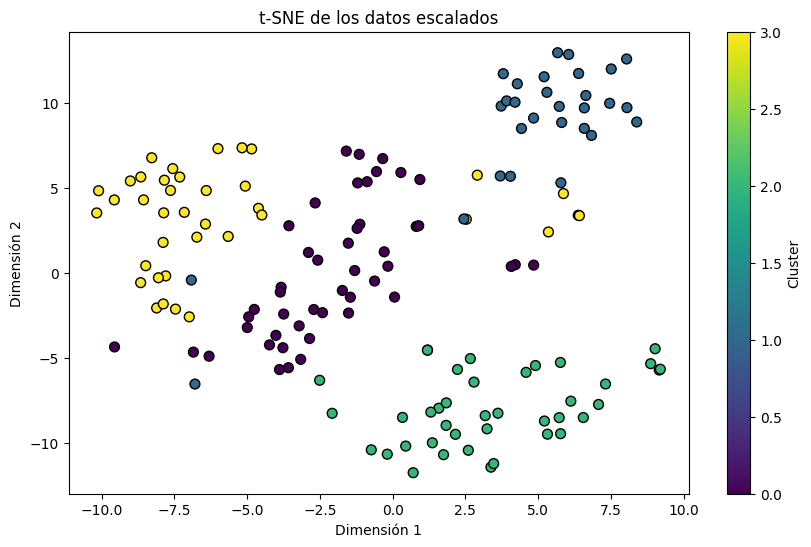

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

# Supongamos que ya tienes tu dataframe aguadataframe1 preparado
# Seleccionar solo las columnas numéricas para clustering
columnas_a_clusterizar = aguadataframe1.select_dtypes(include='number')

# Escalar los datos usando RobustScaler
scaler = RobustScaler()
data_scaled = scaler.fit_transform(columnas_a_clusterizar)

# Aplicar K-Means para obtener etiquetas de cluster
n_clusters = 4  # Ajusta esto según tu análisis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Aplicar t-SNE para reducir la dimensionalidad
tsne = TSNE(n_components=2, random_state=42)  # Reducir a 2 dimensiones
data_tsne = tsne.fit_transform(data_scaled)

# Visualizar los resultados de t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('t-SNE de los datos escalados')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.colorbar(label='Cluster')
plt.show()

Before t-SNE: (154, 26)
After t-SNE: (154, 2)


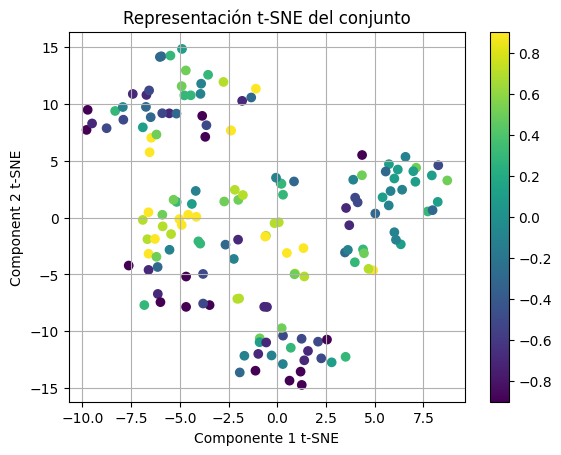

In [335]:
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
#X_tsne = TSNE(n_components=2).fit_transform(X_train_stand) # sin random state
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(aguadataframe1)  # con random state
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(aguadataframe1.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=aguadataframe1["turbiedad_ntu"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

Antes de UMAP: (154, 26)
Después de UMAP: (154, 2)


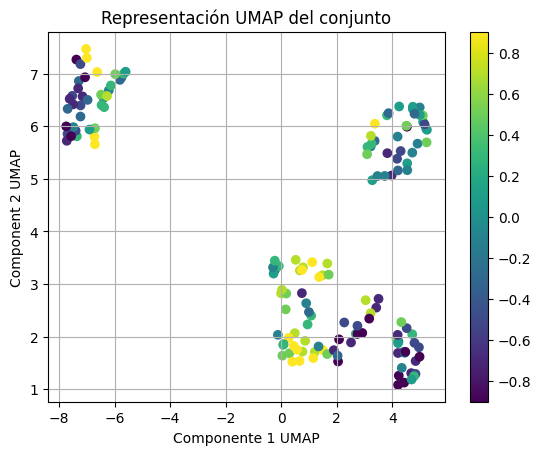

In [336]:
# importamos umap
import umap

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_umap = umap.UMAP(n_components=2).fit_transform(aguadataframe1)
# imprimimos los tamaños antes y después
print('Antes de UMAP: {}'.format(aguadataframe1.shape))
print('Después de UMAP: {}'.format(X_umap.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(X_umap[:,0], X_umap[:,1], c=aguadataframe1["turbiedad_ntu"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 UMAP')
plt.ylabel('Component 2 UMAP')
plt.title('Representación UMAP del conjunto')
plt.colorbar()
plt.show()

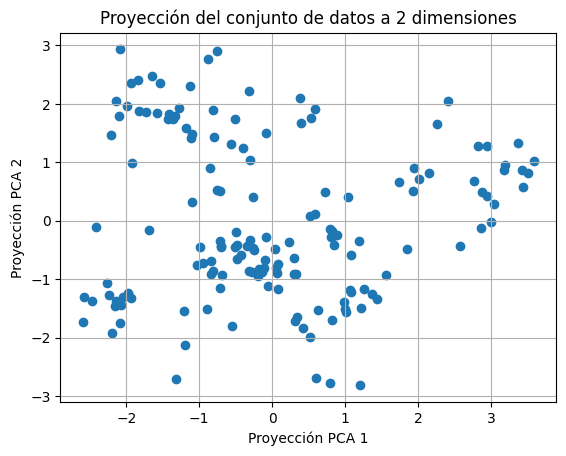

In [301]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(aguadataframe1)
# graficamos los datos
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

In [302]:
aguadataframe1.describe()

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,cr_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica
count,1.540000e+02,154.000000,1.540000e+02,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,-2.418355e-02,0.151714,3.682437e-04,0.061093,0.003896,0.019481,-0.085714,0.005195,0.018182,0.020779,-0.089610,-0.076623,0.422078,0.006494,0.344156,0.344156,0.240260,0.172619
std,8.820581e-01,0.978524,8.768170e-01,0.811993,0.575409,0.572813,0.582919,0.574034,0.572856,0.564491,0.584346,0.569921,0.794445,0.574931,0.660559,1.335194,0.428635,0.745728
min,-2.241267e+00,-2.200000,-2.109133e+00,-3.005917,-0.900000,-0.900000,-1.000000,-0.900000,-0.900000,-0.900000,-1.000000,-1.000000,-0.500000,-0.900000,0.000000,-2.000000,0.000000,-1.583333
25%,-5.584537e-01,-0.400000,-4.754369e-01,-0.467456,-0.500000,-0.500000,-0.600000,-0.500000,-0.500000,-0.500000,-0.600000,-0.600000,0.000000,-0.500000,0.000000,0.000000,0.000000,-0.333333
50%,-3.304648e-16,0.000000,1.465841e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.415463e-01,0.600000,5.245631e-01,0.532544,0.500000,0.500000,0.400000,0.500000,0.500000,0.500000,0.400000,0.400000,1.000000,0.500000,0.000000,1.000000,0.000000,0.666667
max,1.745692e+00,2.400000,3.578305e+00,2.934911,0.900000,0.900000,0.800000,0.900000,0.900000,0.900000,0.800000,0.800000,2.000000,0.900000,2.000000,3.000000,1.000000,2.833333
